<a href="https://colab.research.google.com/github/Marcysp/PCVK_Ganjil_2023/blob/main/week12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import library
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
from google.colab.patches import cv2_imshow

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Latihan

In [3]:
def display(img,cmap='gray'):
  fig = plt.figure(figsize=(12,10))
  ax = fig.add_subplot(111)
  ax.imshow(img,cmap='gray')

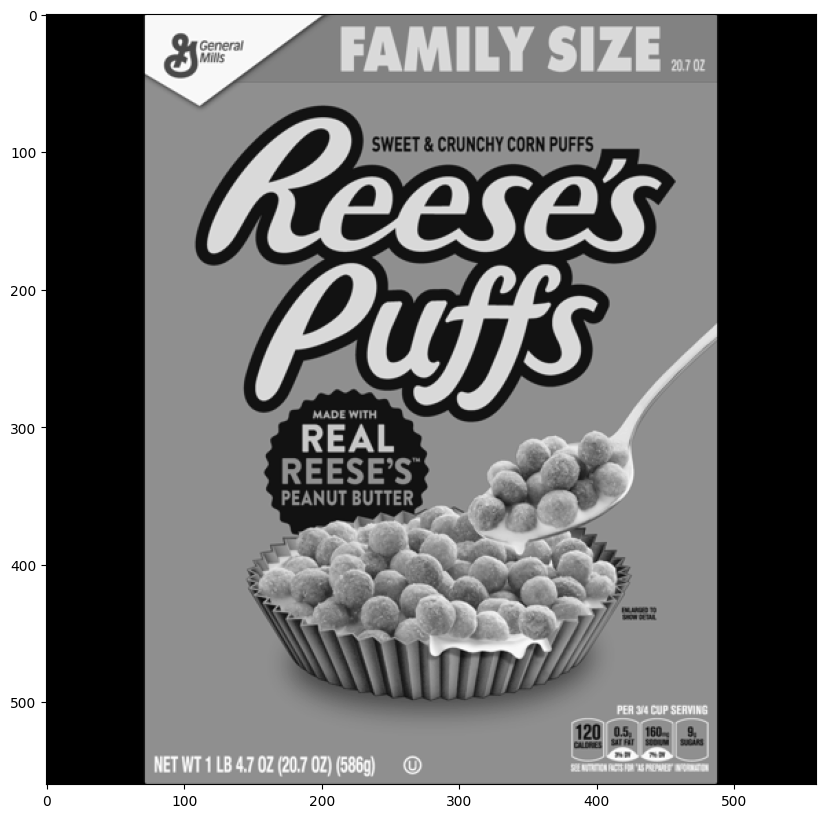

In [4]:
reeses = cv2.imread('/content/drive/MyDrive/PCVK_sem5/facedet/reeses_puffs.png',0)
display(reeses)

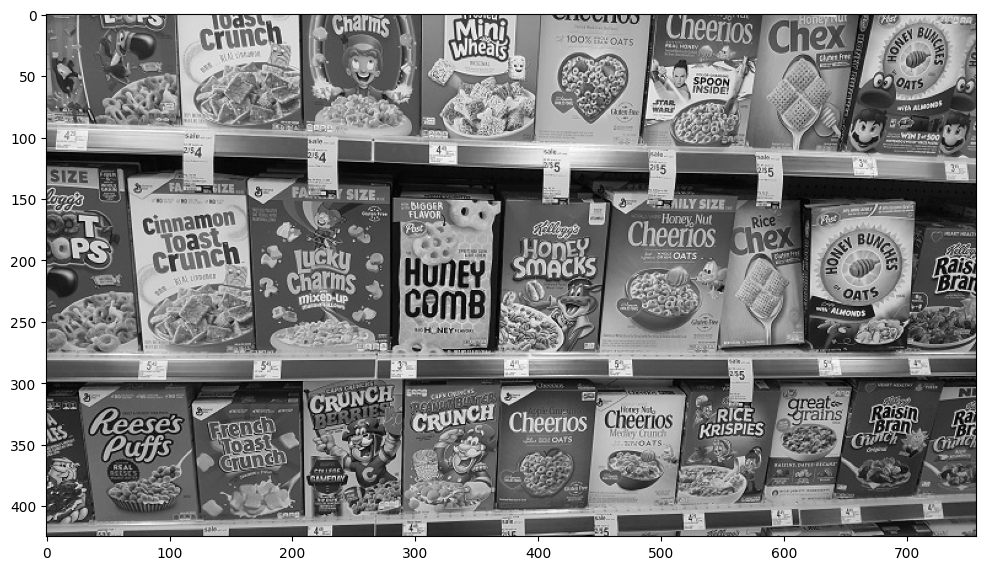

In [5]:
cereals = cv2.imread('/content/drive/MyDrive/PCVK_sem5/facedet/many_cereals.jpg',0)
display(cereals)

In [6]:
orb = cv2.ORB_create()

kp1, des1 = orb.detectAndCompute(reeses,None)
kp2, des2 = orb.detectAndCompute(cereals,None)
bf = cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck = True)

matches = bf.match(des1,des2)

single_match = matches[0]
# print("Jarak:", single_match.distance)
single_match.distance

71.0

In [7]:
len(matches)

139

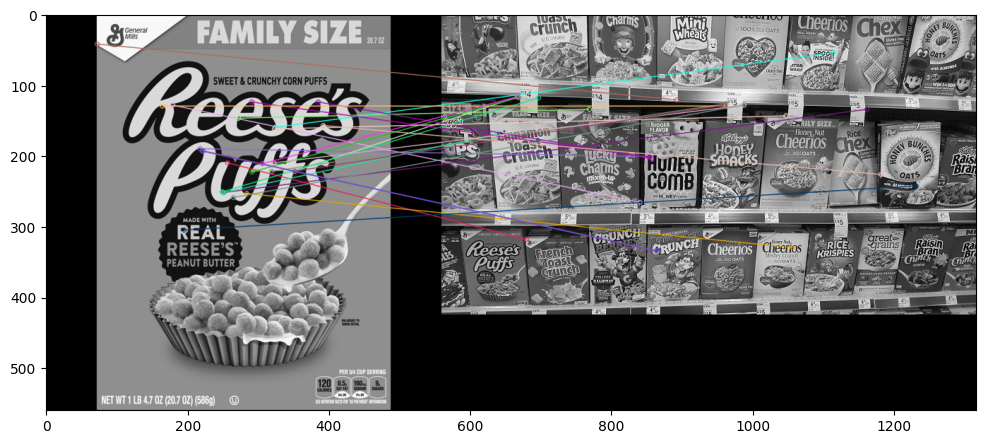

In [8]:
matches = sorted(matches, key = lambda x:x.distance)
reeses_match = cv2.drawMatches(reeses, kp1, cereals, kp2, matches[:25],None, flags=2)
display(reeses_match)

### Pencocokan lebih akurat

In [9]:
!pip install opencv-contrib-python==4.8.0.74

In [20]:
sift = cv2.xfeatures2d.SIFT_create()

kp1, des1 = sift.detectAndCompute(reeses,None)
kp2, des2 = sift.detectAndCompute(cereals,None)

bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)

good = []

# Makin kecil jarak makin cocok
# rasio match1 < 75% match2
for match1,match2 in matches:
  # jika jarak match1 lebih kecil dari jarak 75% match2
  # descriptor disimpan
  if match1.distance < 0.75*match2.distance:
    good.append([match1])

len(good)

79

In [21]:
len(matches)

1501

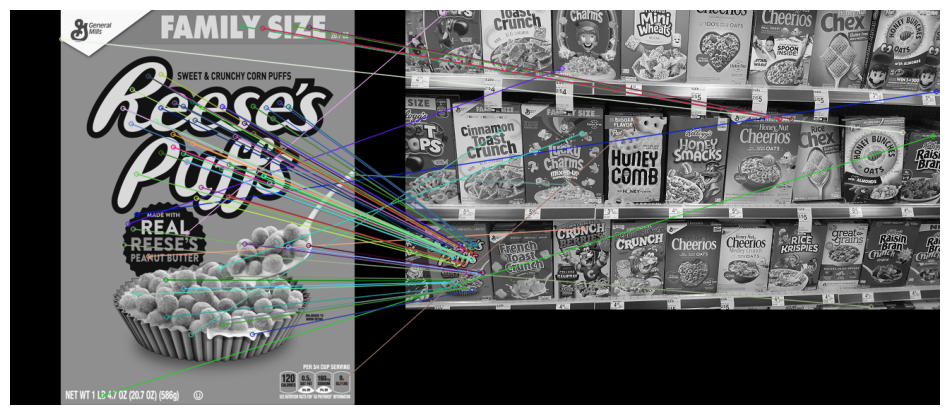

In [31]:
sift_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags=2)

# display gambar
plt.figure(figsize=(12, 6))
plt.imshow(sift_matches)
plt.axis('off')
plt.show()

#### latihan lanjutan

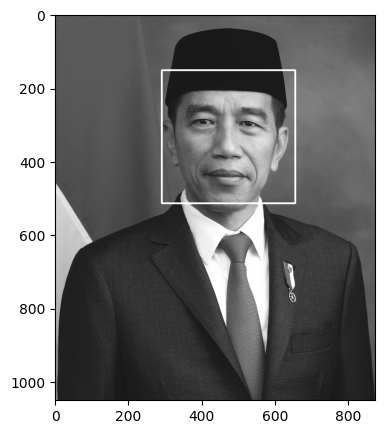

In [37]:
cascade_wajah = cv2.CascadeClassifier('/content/drive/MyDrive/PCVK_sem5/haarcascades/haarcascade_frontalface_alt.xml')
jokowi = cv2.imread('/content/drive/MyDrive/PCVK_sem5/facedet/jokowi.jpg',0)

roi_wajah = cascade_wajah.detectMultiScale(jokowi)
for(x,y,w,h) in roi_wajah:
 cv2.rectangle(jokowi,(x,y),(x+w,y+h),(255,255,255),3)
plt.figure(figsize = (5,5))
plt.imshow(jokowi, cmap='gray')

## Tugas Praktikum

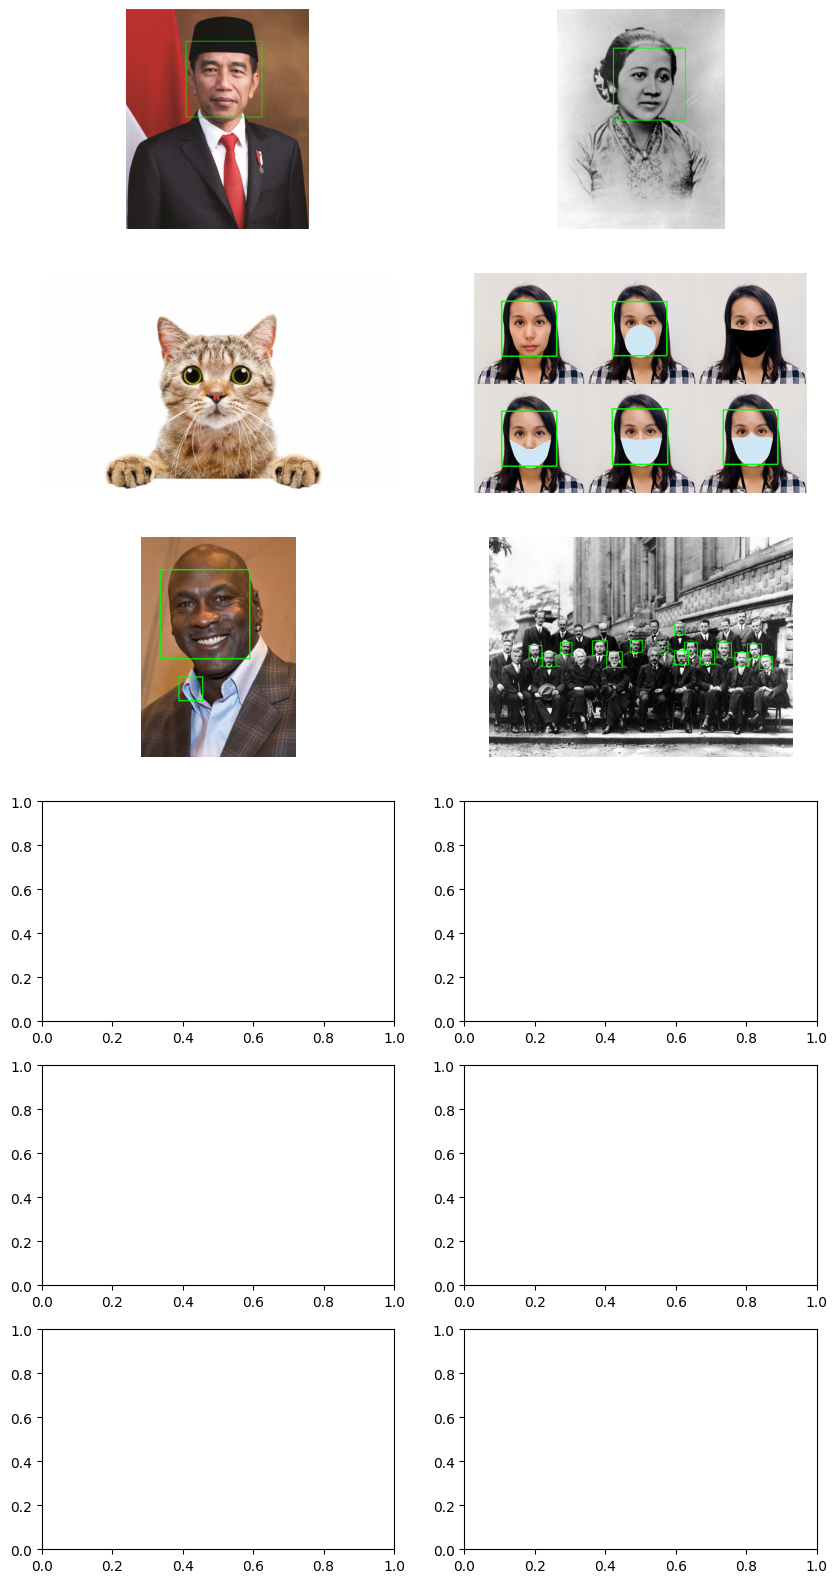

In [47]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def detect_faces(image_path, ax):
    # Baca gambar
    image = cv2.imread(image_path)
    # Ubah gambar menjadi ke skala abu-abu
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Inisialisasi detektor wajah
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Deteksi wajah
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

    # Gambar kotak di sekitar wajah
    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # Tampilkan gambar dengan kotak di sekitar wajah
    ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax.axis('off')

# Lokasi gambar
image_paths = [
    '/content/drive/MyDrive/PCVK_sem5/facedet/jokowi.jpg',
    '/content/drive/MyDrive/PCVK_sem5/facedet/kartini.jpg',
    '/content/drive/MyDrive/PCVK_sem5/facedet/kucing.jpg',
    '/content/drive/MyDrive/PCVK_sem5/facedet/mask.png',
    '/content/drive/MyDrive/PCVK_sem5/facedet/mjordan.jpg',
    '/content/drive/MyDrive/PCVK_sem5/facedet/solvayconf.jpg'
]

# Menampilkan semua gambar dalam satu subplot
fig, axes = plt.subplots(6, 2, figsize=(10, 20))

for image_path, ax in zip(image_paths, axes.flatten()):
    img = mpimg.imread(image_path)
    ax.imshow(img)
    ax.axis('off')
    detect_faces(image_path, ax)

plt.show()


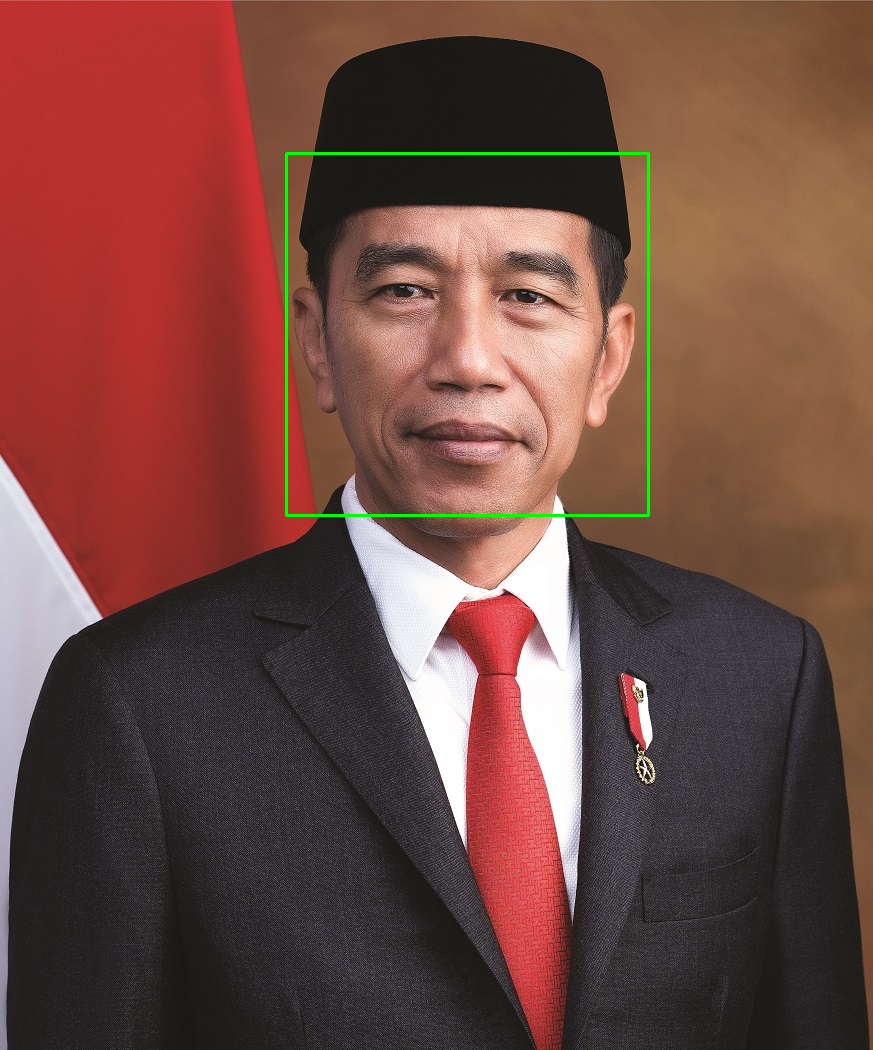

In [14]:
# Fungsi untuk mendeteksi wajah pada gambar
def detect_faces(image_path):
    # Baca gambar
    image = cv2.imread(image_path)
    # Ubah gambar menjadi ke skala abu-abu
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Inisialisasi detektor wajah
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Deteksi wajah
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

    # Gambar kotak di sekitar wajah
    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # Tampilkan gambar dengan kotak di sekitar wajah
    cv2_imshow(image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Lokasi gambar
image_path1 = '/content/drive/MyDrive/PCVK_sem5/facedet/jokowi.jpg'
image_path2 = '/content/drive/MyDrive/PCVK_sem5/facedet/kartini.jpg'
image_path3 = '/content/drive/MyDrive/PCVK_sem5/facedet/kucing.jpg'
image_path4 = '/content/drive/MyDrive/PCVK_sem5/facedet/mask.png'
image_path5 = '/content/drive/MyDrive/PCVK_sem5/facedet/mjordan.jpg'
image_path6 = '/content/drive/MyDrive/PCVK_sem5/facedet/solvayconf.jpg'
detect_faces(image_path1)

In [15]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


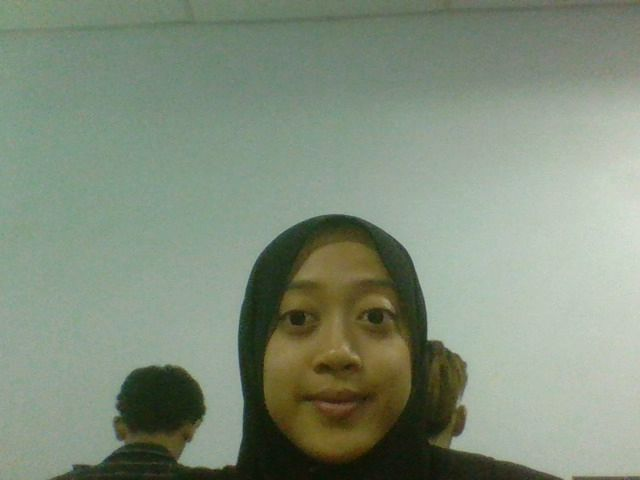

In [16]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))